In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from dateutil import parser
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('/work/customer_data.csv')
df

,id,full_name,email,phone,address,signup_date,name,gender,age
0,1,Kara Kim,kara.kim1924@yahoo.com,804-681-7662,"8971 Pine Ave, Greenville, TX 76366",2022-03-13,Elena,Female,60
1,2,Kelly Peterson,NaN,(467) 700-2147,"7619 Cedar Ln, Madison, CA 32004",10/04/2019,Bob,Female,50
2,3,Henry Martin,henry.martin0365@mail.com,(378) 615-9326,"785 Elm St, Centerville, FL 70040",01/11/2019,Carlos,Male,36
3,4,Walter Evans,walter.evans9757@hotmail.com,406-811-1412,"9383 Elm St, Springfield, TX 27467",09/22/2021,Diana,Female,64
4,5,William Anderson,william.anderson8799@gmail.com,260-206-8340,"615 Sunset Blvd, Riverside, IL 02711",11/15/2020,George,Female,29
...,...,...,...,...,...,...,...,...,...
995,996,Kevin White,kevin.white6863@protonmail.com,(742) 990-9163,NaN,12/08/2019,George,Female,54
996,997,Kyle Mitchell,kyle.mitchell7313@protonmail.com,(905) 994-3879,"6248 Oak St, Georgetown, IL 43690",06/09/2019,Carlos,Male,25
997,998,Holly Chavez,holly.chavez9133@gmail.com,(410) 204-3172,"1969 Pine Ave, Springfield, TX 21039",08/31/2020,Carlos,Male,43
998,999,Frank Foster,frank.foster6200@protonmail.com,609-287-1080,"7204 Elm St, Centerville, IL 00057",09/18/2022,Frank,Female,23


## Verificaciones generales en el df

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           1000 non-null   int64 
 1   full_name    916 non-null    object
 2   email        892 non-null    object
 3   phone        902 non-null    object
 4   address      897 non-null    object
 5   signup_date  902 non-null    object
 6   name         1000 non-null   object
 7   gender       1000 non-null   object
 8   age          1000 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 70.4+ KB


In [4]:
duplicados = df.duplicated().sum()
duplicados

0

## Verificaciones por columnas

### name

In [5]:
name_duplicados = df['name'].duplicated().sum()
name_duplicados

992

In [6]:
name_unicos = df['name'].unique()
name_unicos

array(['Elena', 'Bob', 'Carlos', 'Diana', 'George', 'Hannah', 'Alice',
       'Frank'], dtype=object)

### id

In [7]:
id_duplicados = df['id'].duplicated().sum()
id_duplicados

0

### full_name

In [8]:
df['full_name'].isnull().sum()

84

### Registros duplicados de full_name

In [9]:
nombres_duplicados = df['full_name'].dropna().duplicated().sum()
nombres_duplicados

33

In [10]:
df_nombres_duplicados = df[df['full_name'].duplicated(keep=False)].dropna(subset=['full_name'])
df_nombres_duplicados

,id,full_name,email,phone,address,signup_date,name,gender,age
10,11,Zoey Nelson,zoey.nelson2543@mail.com,+1 (930) 558-5510,"1701 Maple Dr, Apt 30, Franklin, IL 22547",2019-05-18,Alice,Female,32
24,25,Riley Howard,riley.howard8272@aol.com,+1 (970) 822-1022,"6815 Maple Dr, Greenville, FL 75154",05/13/2022,Frank,Female,33
45,46,Amber Rogers,amber.rogers2699@outlook.com,+1 (876) 673-4814,"3495 Cedar Ln, Apt 62, Clinton, FL 74985",08/07/2023,Hannah,Male,41
50,51,Uma Harris,NaN,(373) 883-6608,"5559 Sunset Blvd, Greenville, IL 98040",2020-03-05,Hannah,Female,35
54,55,Liam Young,liam.young0769@yahoo.com,327-352-5278,"8075 Washington Blvd, Riverside, NY 63999",10/03/2022,Bob,Female,25
...,...,...,...,...,...,...,...,...,...
879,880,Edward Nelson,edward.nelson7584@protonmail.com,NaN,NaN,04/19/2023,Frank,Male,51
882,883,Ximena Morgan,ximena.morgan4428@protonmail.com,+1 (593) 775-2067,NaN,10/07/2021,Frank,Male,15
905,906,Kevin Gutierrez,kevin.gutierrez1804@protonmail.com,(396) 946-9392,"8626 Elm St, Greenville, TX 74554",07-06-2021,George,Female,54
969,970,Tyler Ortiz,tyler.ortiz9020@outlook.com,+1 (417) 328-9852,"4433 Pine Ave, Fairview, FL 39022",01/20/2022,Bob,Female,46


In [11]:
Ejemplo_nombre_duplicado = df_nombres_duplicados[df_nombres_duplicados['full_name'] == 'Zoey Nelson']
Ejemplo_nombre_duplicado

,id,full_name,email,phone,address,signup_date,name,gender,age
10,11,Zoey Nelson,zoey.nelson2543@mail.com,+1 (930) 558-5510,"1701 Maple Dr, Apt 30, Franklin, IL 22547",2019-05-18,Alice,Female,32
621,622,Zoey Nelson,NaN,NaN,"7001 Washington Blvd, Apt 92, Springfield, TX ...",2023-05-23,Bob,Male,32


### Formato de los datos

In [12]:
nombres = df['full_name'].dropna().unique()
nombres[:4]

array(['Kara Kim', ' Kelly Peterson ', ' Henry Martin ', ' Walter Evans '],
      dtype=object)

In [13]:
espacio_inicio = 0
espacio_final = 0
caracteres_invalidos = 0

patron = re.compile(r'^[A-Za-zÁÉÍÓÚáéíóúÑñ ]+$')

for nombre in nombres:
    if not isinstance(nombre, str):
        nombre = str(nombre)
        print('Valor convertido a string: ', nombre)

    if nombre.startswith(' '):
        espacio_inicio += 1
    if nombre.endswith(' '):
        espacio_final += 1
    if not patron.match(nombre):
        caracteres_invalidos += 1

print('',espacio_inicio, '\n', espacio_final, '\n', caracteres_invalidos)

 286 
 286 
 0


Sin contar los 84 valores nulos, todos los valores dentro de la columna full_name representan nombres pero 286 de ellos presentan un formateo incorrecto, con espacios en blanco al inicio y al final.

### email

In [14]:
df['email'].isnull().sum()

108

In [15]:
emails = df['email'].dropna().unique()
emails[:5]

array(['kara.kim1924@yahoo.com', 'henry.martin0365@mail.com',
       'walter.evans9757@hotmail.com', 'william.anderson8799@gmail.com',
       'uma.white7642@outlook.com'], dtype=object)

In [16]:
emails_duplicados = df['email'].dropna().duplicated().sum()
emails_duplicados

0

In [17]:
pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'

validos = df["email"].str.match(pattern, na=False).sum()
nulos = df["email"].isna().sum()

df_invalidos = df[~df["email"].str.match(pattern, na=False)]

print(' Cantidad de emails validos', validos, '\n', 'Cantidad de emails nulos', nulos, '\n', 'Cantidad de emails invalidos', len(df_invalidos))

 Cantidad de emails validos 892 
 Cantidad de emails nulos 108 
 Cantidad de emails invalidos 108


In [18]:
df_invalidos

,id,full_name,email,phone,address,signup_date,name,gender,age
1,2,Kelly Peterson,NaN,(467) 700-2147,"7619 Cedar Ln, Madison, CA 32004",10/04/2019,Bob,Female,50
19,20,Tyler Murphy,NaN,(738) 219-1908,"4377 Sunset Blvd, Franklin, IL 58991",05/28/2023,Alice,Female,51
33,34,Quincy Martinez,NaN,+1 (726) 945-7154,"6282 Main St, Riverside, TX 02640",07/22/2020,Elena,Female,58
36,37,Connor Foster,NaN,367.466.1309,NaN,2021-04-16,Carlos,Male,30
38,39,Ximena Parker,NaN,+1 (595) 332-4108,"2373 Oak St, Springfield, TX 36273",09/19/2020,George,Female,39
...,...,...,...,...,...,...,...,...,...
946,947,Patrick Green,NaN,752-325-7438,"1133 Maple Dr, Madison, IL 97043",2020-10-02,Carlos,Male,56
952,953,Hailey Gray,NaN,+1 (956) 699-3574,"5611 Hillcrest Ave, Springfield, NY 94950",06/22/2022,George,Female,47
963,964,Riley Walker,NaN,NaN,NaN,NaN,Elena,Female,53
973,974,Yosef Gonzalez,NaN,280.366.7624,"659 Main St, Apt 79, Franklin, CA 37766",2023-12-01,Elena,Male,35


### Phone

In [19]:
phone_null = df['phone'].isnull().sum()
phone_null

98

In [21]:
numeros_duplicados = df[df['phone'].duplicated(keep=False)]
numeros_duplicados

,id,full_name,email,phone,address,signup_date,name,gender,age
5,6,Uma White,uma.white7642@outlook.com,NaN,"8610 Main St, Georgetown, FL 58933",2023-10-23,George,Female,42
9,10,Ursula Price,ursula.price8048@gmail.com,NaN,"5557 Lakeview Dr, Apt 59, Franklin, NY 75924",24-09-2019,Alice,Female,32
14,15,Riley Kim,riley.kim0733@mail.com,NaN,"9521 Elm St, Centerville, CA 72639",12/19/2021,George,Female,45
15,16,Hank Hernandez,hank.hernandez7411@gmail.com,NaN,"6564 Hillcrest Ave, Clinton, CA 47053",02/04/2023,Elena,Female,24
60,61,Kyle Sanders,kyle.sanders6813@protonmail.com,NaN,"1927 Cedar Ln, Fairview, FL 95120",2019-10-18,George,Female,39
...,...,...,...,...,...,...,...,...,...
926,927,Penelope Hughes,penelope.hughes4301@yahoo.com,NaN,"9658 Washington Blvd, Georgetown, NY 15749",21-05-2020,Carlos,Male,51
961,962,William Flores,william.flores1803@protonmail.com,NaN,"7477 Oak St, Apt 17, Arlington, CA 42920",11-06-2019,George,Female,61
963,964,Riley Walker,NaN,NaN,NaN,NaN,Elena,Female,53
964,965,Charlie Taylor,charlie.taylor9573@mail.com,NaN,"3013 Maple Dr, Fairview, CA 38330",03-06-2020,Frank,Male,59


In [22]:
def detectar_formato(num):
    if pd.isna(num):
        return "Nulo"
    num = str(num).strip()

    # Solo dígitos
    if re.fullmatch(r"\d{10}", num):
        return "Solo dígitos (10)"
    elif re.fullmatch(r"\d{5,9}", num):
        return "Solo dígitos (corto)"

    # Diferentes separadores
    elif re.fullmatch(r"\d{3}-\d{3}-\d{4}", num):
        return "Guiones"
    elif re.fullmatch(r"\d{3}\s\d{3}\s\d{4}", num):
        return "Espacios"
    elif re.fullmatch(r"\d{3}\.\d{3}\.\d{4}", num):
        return "Puntos"

    # Con paréntesis
    elif re.fullmatch(r"\(\d{3}\)\s\d{3}-\d{4}", num):
        return "Paréntesis + espacio + guion"

    # Prefijo internacional (ej: +1 (930) 558-5510 o +34 912345678)
    elif re.fullmatch(r"\+\d{1,3}\s?\(?\d{2,3}\)?[\s.-]?\d{3}[\s.-]?\d{4}", num):
        return "Prefijo país + formato local"

    # Prefijo internacional seguido de 10 dígitos sin espacios
    elif re.fullmatch(r"\+\d{1,3}\s?\d{10}", num):
        return "Prefijo país + número corrido"

    else:
        return "Formato desconocido"

clasificaciones = df["phone"].apply(detectar_formato).fillna("Nulo")
resumen = (
    df.assign(Formato=clasificaciones)
      .groupby("Formato", dropna=False)
      .agg(Numeros=("phone", list))
)

resumen["Cantidad"] = resumen["Numeros"].apply(len)
resumen = resumen.reset_index()[["Formato", "Cantidad", "Numeros"]]

resumen

,Formato,Cantidad,Numeros
0,Guiones,235,"[804-681-7662, 406-811-1412, 260-206-8340, 536..."
1,Nulo,98,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
2,Paréntesis + espacio + guion,351,"[(467) 700-2147, (378) 615-9326, (899) 966-247..."
3,Prefijo país + formato local,216,"[+1 (930) 558-5510, +1 (468) 471-7169, +1 (970..."
4,Puntos,100,"[705.658.9746, 705.838.1831, 766.838.8787, 367..."


In [23]:
numeros_registrados = resumen['Cantidad'].sum()
numeros_registrados

1000

In [24]:
filtro = resumen[resumen['Formato'] == 'Puntos']
numero_raro = list(filtro['Numeros'])[0]

for numero in range(len(numero_raro)):
    print(numero_raro[numero])

705.658.9746
705.838.1831
766.838.8787
367.466.1309
903.690.4849
467.332.8411
785.436.3546
752.249.3124
513.502.7451
980.920.6199
661.317.1061
903.663.3338
623.201.4783
226.434.4260
545.644.5317
604.213.6104
619.987.4111
663.324.1387
999.282.5682
658.602.8144
672.731.5959
647.455.9272
688.564.5004
408.920.7464
438.970.9296
215.336.8161
892.612.9854
977.918.6178
257.696.8979
375.333.2577
527.693.8686
585.259.9350
519.663.7300
672.527.3486
998.352.9640
381.353.3514
371.555.6206
799.928.3717
656.316.1161
237.970.7058
974.875.3876
292.338.5662
952.212.3300
646.623.9763
300.375.7472
950.850.3237
734.674.9672
583.913.1181
569.825.5708
229.534.9807
852.332.4419
243.754.3733
521.596.3449
851.567.8687
584.678.5966
227.517.8928
616.472.2279
859.839.5683
268.884.1169
539.565.1076
773.900.3058
266.589.2650
289.836.6793
472.491.8174
255.633.5540
954.220.3667
791.258.2334
738.264.4442
325.396.7826
568.719.8819
561.468.3910
456.853.2137
576.875.8296
768.726.2445
485.419.3676
647.369.4452
492.573.3125

## Transformaciones

### phone

In [25]:
def transformar_phone(num, default_prefix="+1"):
    if pd.isna(num):
        return num

    # Extraer solo los dígitos
    digits = re.sub(r"\D", "", str(num))

    # Si no tiene 10 dígitos, lo devolvemos sin tocar
    if len(digits) != 10:
        return num  

    # Convertir al formato estandarizado
    area, central, line = digits[:3], digits[3:6], digits[6:]
    return f"{default_prefix} ({area}) {central}-{line}"


In [26]:
df["phone"] = df["phone"].apply(transformar_phone)
df

,id,full_name,email,phone,address,signup_date,name,gender,age
0,1,Kara Kim,kara.kim1924@yahoo.com,+1 (804) 681-7662,"8971 Pine Ave, Greenville, TX 76366",2022-03-13,Elena,Female,60
1,2,Kelly Peterson,NaN,+1 (467) 700-2147,"7619 Cedar Ln, Madison, CA 32004",10/04/2019,Bob,Female,50
2,3,Henry Martin,henry.martin0365@mail.com,+1 (378) 615-9326,"785 Elm St, Centerville, FL 70040",01/11/2019,Carlos,Male,36
3,4,Walter Evans,walter.evans9757@hotmail.com,+1 (406) 811-1412,"9383 Elm St, Springfield, TX 27467",09/22/2021,Diana,Female,64
4,5,William Anderson,william.anderson8799@gmail.com,+1 (260) 206-8340,"615 Sunset Blvd, Riverside, IL 02711",11/15/2020,George,Female,29
...,...,...,...,...,...,...,...,...,...
995,996,Kevin White,kevin.white6863@protonmail.com,+1 (742) 990-9163,NaN,12/08/2019,George,Female,54
996,997,Kyle Mitchell,kyle.mitchell7313@protonmail.com,+1 (905) 994-3879,"6248 Oak St, Georgetown, IL 43690",06/09/2019,Carlos,Male,25
997,998,Holly Chavez,holly.chavez9133@gmail.com,+1 (410) 204-3172,"1969 Pine Ave, Springfield, TX 21039",08/31/2020,Carlos,Male,43
998,999,Frank Foster,frank.foster6200@protonmail.com,+1 (609) 287-1080,"7204 Elm St, Centerville, IL 00057",09/18/2022,Frank,Female,23


In [27]:
# Verificaciones finales
clasificaciones = df["phone"].apply(detectar_formato).fillna("Nulo")
resumen = (
    df.assign(Formato=clasificaciones)
      .groupby("Formato", dropna=False)
      .agg(Numeros=("phone", list))
)

resumen["Cantidad"] = resumen["Numeros"].apply(len)
resumen = resumen.reset_index()[["Formato", "Cantidad", "Numeros"]]

resumen

,Formato,Cantidad,Numeros
0,Nulo,98,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
1,Prefijo país + formato local,902,"[+1 (804) 681-7662, +1 (467) 700-2147, +1 (378..."


### signup_date

In [28]:
def transformar_fecha(fecha):
    if pd.isna(fecha):
        return pd.NaT
    
    try:
        # Intentar parsear con dateutil 
        return parser.parse(str(fecha), dayfirst=False)  
    except:
        try:
            # Si falla, intentar de nuevo pero interpretando primero el día
            return parser.parse(str(fecha), dayfirst=True)
        except:
            return pd.NaT

In [29]:
df["signup_date"] = df["signup_date"].apply(transformar_fecha)

# EDA

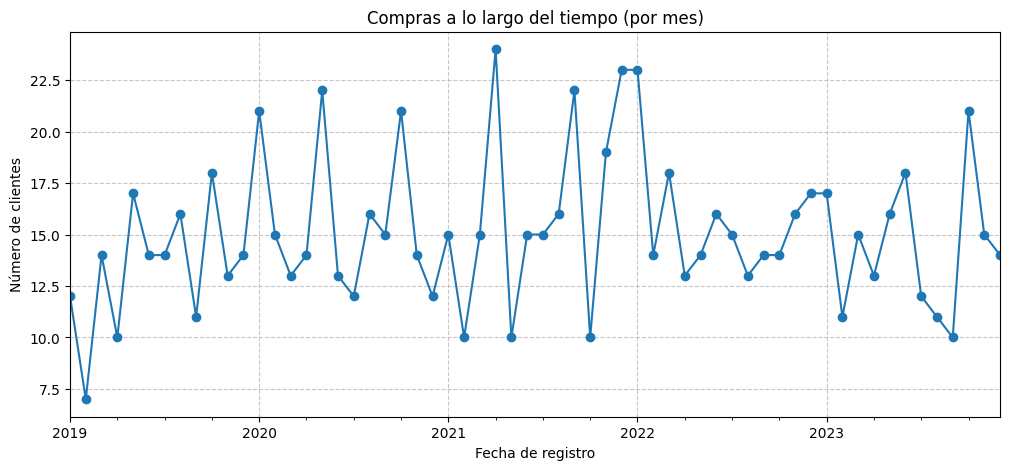

In [30]:
plt.figure(figsize=(12,5))
df.set_index("signup_date").resample("M")["id"].count().plot(kind="line", marker="o")
plt.title("Compras a lo largo del tiempo (por mes)")
plt.xlabel("Fecha de registro")
plt.ylabel("Número de clientes")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

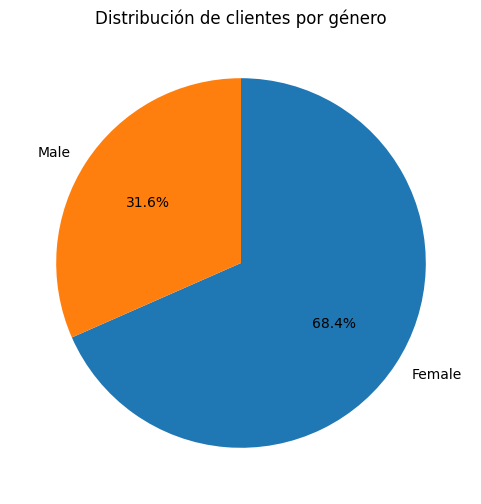

In [31]:
plt.figure(figsize=(6,6))
genero_counts = df["gender"].value_counts()
plt.pie(genero_counts, labels=genero_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title("Distribución de clientes por género")
plt.show()

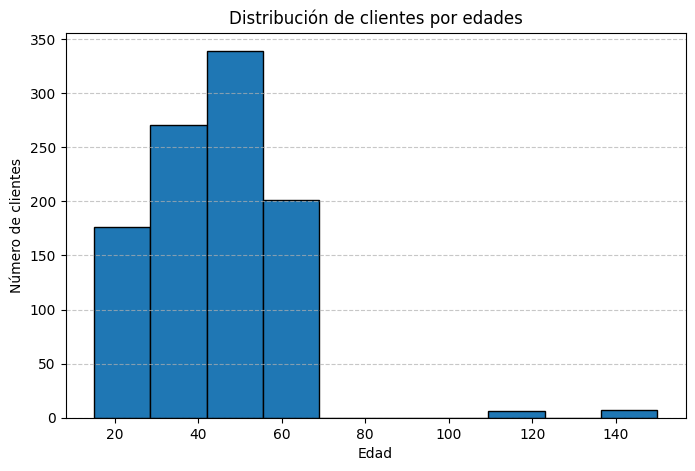

In [32]:
plt.figure(figsize=(8,5))
plt.hist(df["age"], bins=10, edgecolor="black")
plt.title("Distribución de clientes por edades")
plt.xlabel("Edad")
plt.ylabel("Número de clientes")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

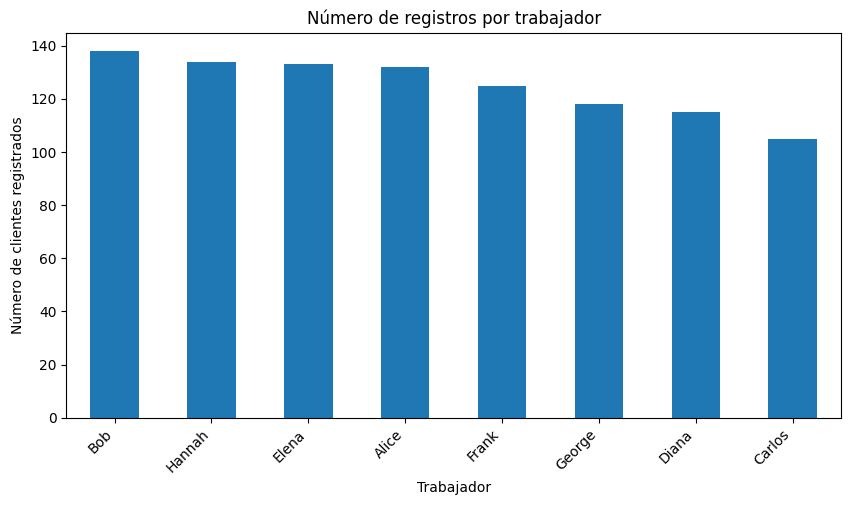

In [33]:
plt.figure(figsize=(10,5))
df["name"].value_counts().plot(kind="bar")
plt.title("Número de registros por trabajador")
plt.xlabel("Trabajador")
plt.ylabel("Número de clientes registrados")
plt.xticks(rotation=45, ha="right")
plt.show()

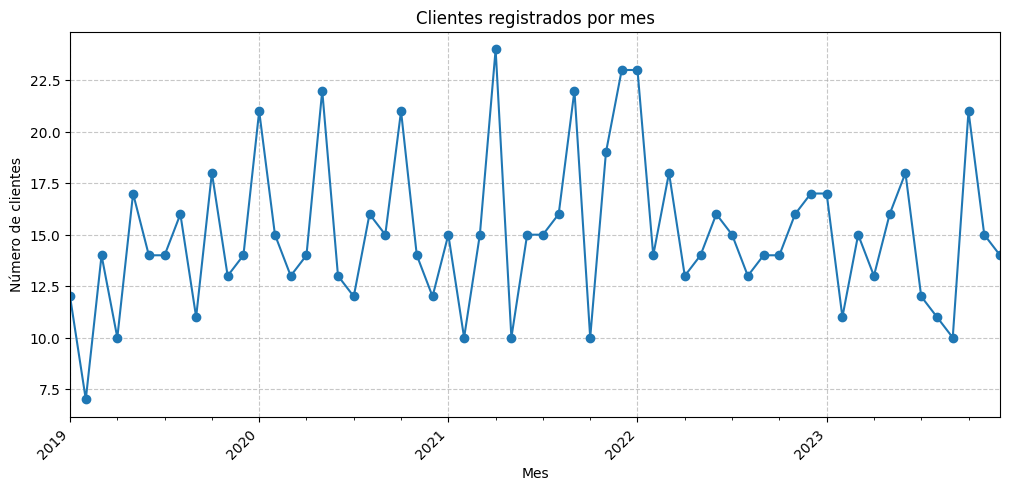

In [34]:
plt.figure(figsize=(12,5))
df.set_index("signup_date").resample("M")["id"].count().plot(kind="line", marker="o")

plt.title("Clientes registrados por mes")
plt.xlabel("Mes")
plt.ylabel("Número de clientes")
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(rotation=45, ha="right")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=171bad0a-62a2-42cc-9180-d14c0a1c4c1a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>